In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
working=os.getcwd()
print(working)

/Users/kumarmayank


In [76]:
path= working + "/data/testnew.csv"

In [77]:
df=pd.read_csv(path)

In [78]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact
0,30,management,married,tertiary,no,1476,yes,yes,unknown
1,59,blue-collar,married,secondary,no,0,yes,no,unknown
2,35,management,single,tertiary,no,747,no,no,cellular
3,36,self-employed,married,tertiary,no,307,yes,no,cellular
4,39,technician,married,secondary,no,147,yes,no,cellular


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4518 entries, 0 to 4517
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4518 non-null   int64 
 1   job        4518 non-null   object
 2   marital    4518 non-null   object
 3   education  4518 non-null   object
 4   default    4518 non-null   object
 5   balance    4518 non-null   int64 
 6   housing    4518 non-null   object
 7   loan       4518 non-null   object
 8   contact    4518 non-null   object
dtypes: int64(2), object(7)
memory usage: 317.8+ KB


In [80]:
x=df.iloc[:,[0,5]].values

In [98]:
x
x.reshape(-1,1)
identified=list(x)

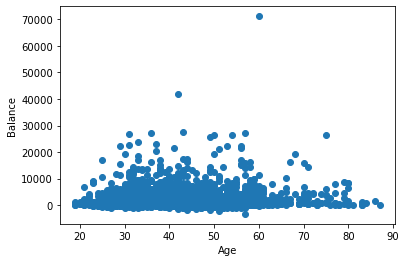

In [99]:
plt.xlabel('Age')
plt.ylabel('Balance')
plt.scatter(df['age'],df['balance'])

In [100]:
df['Identified']=identified

In [101]:
df

,age,job,marital,education,default,balance,housing,loan,contact,Identified
0,30,management,married,tertiary,no,1476,yes,yes,unknown,"[30, 1476]"
1,59,blue-collar,married,secondary,no,0,yes,no,unknown,"[59, 0]"
2,35,management,single,tertiary,no,747,no,no,cellular,"[35, 747]"
3,36,self-employed,married,tertiary,no,307,yes,no,cellular,"[36, 307]"
4,39,technician,married,secondary,no,147,yes,no,cellular,"[39, 147]"
...,...,...,...,...,...,...,...,...,...,...
4513,33,services,married,secondary,no,-333,yes,no,cellular,"[33, -333]"
4514,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,"[57, -3313]"
4515,57,technician,married,secondary,no,295,no,no,cellular,"[57, 295]"
4516,28,blue-collar,married,secondary,no,1137,no,no,cellular,"[28, 1137]"


In [106]:
new_scaler= MinMaxScaler()
new_scaler.fit(df[['balance']])
df['balance']=new_scaler.transform(df[['balance']])
new_scaler.fit(df[['age']])
df['age']=new_scaler.transform(df[['age']])

In [107]:
df

,age,job,marital,education,default,balance,housing,loan,contact,Identified
0,0.161765,management,married,tertiary,no,0.064281,yes,yes,unknown,"[30, 1476]"
1,0.588235,blue-collar,married,secondary,no,0.044469,yes,no,unknown,"[59, 0]"
2,0.235294,management,single,tertiary,no,0.054496,no,no,cellular,"[35, 747]"
3,0.250000,self-employed,married,tertiary,no,0.048590,yes,no,cellular,"[36, 307]"
4,0.294118,technician,married,secondary,no,0.046442,yes,no,cellular,"[39, 147]"
...,...,...,...,...,...,...,...,...,...,...
4513,0.205882,services,married,secondary,no,0.039999,yes,no,cellular,"[33, -333]"
4514,0.558824,self-employed,married,tertiary,yes,0.000000,yes,yes,unknown,"[57, -3313]"
4515,0.558824,technician,married,secondary,no,0.048429,no,no,cellular,"[57, 295]"
4516,0.132353,blue-collar,married,secondary,no,0.059731,no,no,cellular,"[28, 1137]"


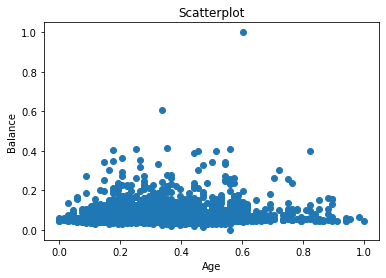

In [108]:
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title("Scatterplot")
plt.scatter(df['age'],df['balance'])


In [46]:
from sklearn.cluster import KMeans

In [109]:
y_inertia = []
K = range(1,11)
for i in K:
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df[['age','balance']])
    y_inertia.append(kmeans.inertia_)
    

In [110]:
y_inertia

[116.6650618253706,
 40.5485175054482,
 25.59791049105843,
 19.43686212163295,
 14.919185644676851,
 12.38191994358781,
 9.958824880924496,
 8.7504605450745,
 7.6833731043152,
 6.7475382154603105]

Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.
Inertia: It is the sum of squared distances of samples to their closest cluster center.

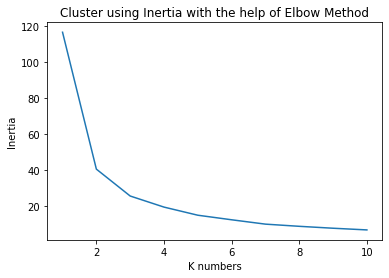

In [111]:
plt.ylabel("Inertia")
plt.xlabel("K numbers")
plt.title("Cluster using Inertia with the help of Elbow Method")
plt.plot(K,y_inertia)
plt.show()

In [112]:
kmeans=KMeans(n_clusters=2)
kmeans

KMeans(n_clusters=2)

In [114]:
Cluster=kmeans.fit_predict(df[['age','balance']])
Cluster=list(Cluster)

In [57]:
Cluster

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [115]:
df['Clusters']=Cluster

In [116]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,Identified,Clusters
0,0.161765,management,married,tertiary,no,0.064281,yes,yes,unknown,"[30, 1476]",0
1,0.588235,blue-collar,married,secondary,no,0.044469,yes,no,unknown,"[59, 0]",1
2,0.235294,management,single,tertiary,no,0.054496,no,no,cellular,"[35, 747]",0
3,0.250000,self-employed,married,tertiary,no,0.048590,yes,no,cellular,"[36, 307]",0
4,0.294118,technician,married,secondary,no,0.046442,yes,no,cellular,"[39, 147]",0


In [117]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,Identified,Clusters
4513,0.205882,services,married,secondary,no,0.039999,yes,no,cellular,"[33, -333]",0
4514,0.558824,self-employed,married,tertiary,yes,0.000000,yes,yes,unknown,"[57, -3313]",1
4515,0.558824,technician,married,secondary,no,0.048429,no,no,cellular,"[57, 295]",1
4516,0.132353,blue-collar,married,secondary,no,0.059731,no,no,cellular,"[28, 1137]",0
4517,0.367647,entrepreneur,single,tertiary,no,0.059717,yes,yes,cellular,"[44, 1136]",1


In [118]:
df

,age,job,marital,education,default,balance,housing,loan,contact,Identified,Clusters
0,0.161765,management,married,tertiary,no,0.064281,yes,yes,unknown,"[30, 1476]",0
1,0.588235,blue-collar,married,secondary,no,0.044469,yes,no,unknown,"[59, 0]",1
2,0.235294,management,single,tertiary,no,0.054496,no,no,cellular,"[35, 747]",0
3,0.250000,self-employed,married,tertiary,no,0.048590,yes,no,cellular,"[36, 307]",0
4,0.294118,technician,married,secondary,no,0.046442,yes,no,cellular,"[39, 147]",0
...,...,...,...,...,...,...,...,...,...,...,...
4513,0.205882,services,married,secondary,no,0.039999,yes,no,cellular,"[33, -333]",0
4514,0.558824,self-employed,married,tertiary,yes,0.000000,yes,yes,unknown,"[57, -3313]",1
4515,0.558824,technician,married,secondary,no,0.048429,no,no,cellular,"[57, 295]",1
4516,0.132353,blue-collar,married,secondary,no,0.059731,no,no,cellular,"[28, 1137]",0


In [126]:
from sklearn.metrics import silhouette_samples,silhouette_score
ss=[]
K = range(1,11)
for i in K:
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit_predict(df[['age','balance']])
    ss.append(silhouette_score(df[['age','balance']],Cluster))

In [123]:
ss

[0.5860056476800085,
 0.5860056476800085,
 0.5860056476800085,
 0.5860056476800085,
 0.5860056476800085,
 0.5860056476800085,
 0.5860056476800085,
 0.5860056476800085,
 0.5860056476800085,
 0.5860056476800085]

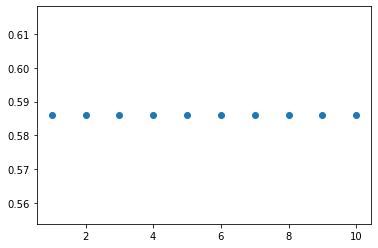

In [124]:
plt.scatter(K,ss)

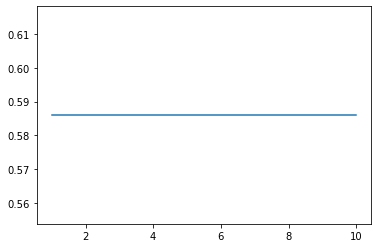

In [127]:
plt.plot(K,ss)
plt.show()